In [57]:
#Khai báo thư viện cần thiết:

import numpy as np
import matplotlib.pyplot as plt
import cv2


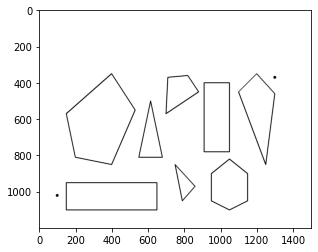

In [58]:
black = (0, 0, 0) #Màu vẽ : đen.

#Tạo bảng
canvas = np.ones([1200, 1500, 3]) #[y,x]
plt.imshow(canvas)

#Vẽ vị trí S: 0
cv2.line(canvas, (100,1020), (100,1020),black, 15)

#Vẽ hình chữ nhật ngang: 1-2-3-4
cv2.line(canvas, (150, 950), (650,950), black,4) #Ngang trên
cv2.line(canvas, (150,950), (150,1100),black,4) #Dọc trái
cv2.line(canvas, (150,1100), (650,1100),black,4) #Ngang dưới
cv2.line(canvas, (650,950), (650,1100),black,4) #Dọc phải


#Vẽ hình ngũ giác: 29-30-31-32-33
cv2.line(canvas, (150,570), (200,810),black,4)
cv2.line(canvas, (200,810), (400,850),black,4)
cv2.line(canvas, (400,850), (530,550),black,4)
cv2.line(canvas, (530,550), (400,350),black,4)
cv2.line(canvas, (150,570), (400,350),black,4)

#Vẽ tam giác cân: 26-27-28
cv2.line(canvas, (550,810), (680,810),black,4)
cv2.line(canvas, (550,810), (615,500),black,4)
cv2.line(canvas, (680,810), (615,500),black,4)

#Vẽ Hình thang: 22-23-24-25
cv2.line(canvas, (700,570), (710,370),black,4)
cv2.line(canvas, (710,370), (820,360),black,4)
cv2.line(canvas, (820,360), (880,450),black,4)
cv2.line(canvas, (880,450), (700,570),black,4)

#Vẽ tam giác vuông: 5-6-7
cv2.line(canvas, (750,850), (790,1050),black,4)
cv2.line(canvas, (790,1050), (860,970),black,4)
cv2.line(canvas, (860,970), (750,850),black,4)

#Vẽ hình chữ nhật đứng: 18-19-20-21
cv2.line(canvas, (910,400), (910,780),black,4)
cv2.line(canvas, (910,780), (1050,780),black,4)
cv2.line(canvas, (1050,780), (1050,400),black,4)
cv2.line(canvas, (1050,400), (910,400),black,4)

#Vẽ lục giác: 8-9-10-11-12-13
cv2.line(canvas, (1050,820), (950,900),black,4)
cv2.line(canvas, (950,900), (950,1050),black,4)
cv2.line(canvas, (950,1050), (1050,1100),black,4)
cv2.line(canvas, (1050,1100), (1150,1050),black,4)
cv2.line(canvas, (1150,1050), (1150,900),black,4)
cv2.line(canvas, (1150,900), (1050,820),black,4)

#Vẽ hình tứ giác: 14-15-16-17
cv2.line(canvas, (1100,450), (1200,350),black,4)
cv2.line(canvas, (1200,350), (1300,460),black,4)
cv2.line(canvas, (1300,460), (1250,850),black,4)
cv2.line(canvas, (1250,850), (1100,450),black,4)

#Vẽ điểm đích G: 34
cv2.line(canvas, (1300,370), (1300,370),black,15)



plt.imshow(canvas)

In [59]:
from collections import defaultdict

graph = defaultdict(list)

graph['0'] = ['1','4','30','31', 1365]
#Bỏ 0

graph['1'] = ['2', '4', '28', '29', '30', 1288]
graph['4'] = ['1', '3', 1362]
graph['30'] = ['1', '29', '31', 1185]
graph['31'] = ['32', 1167]
#Bỏ 1, 4, 30, 31

graph['2'] = ['3', '5', '7', '25', '27', 871]
graph['3'] = ['5', '7', '8', '9', '13', 977]
graph['28'] = ['2', '26', '27', 870]
graph['29'] = ['26', '28', '33', 1020]
graph['32'] = ['23', '24', '26', '33', 900]
#Bỏ 1, 2, 3, 4, 30, 31, 28, 29, 32

graph['5'] = ['6', '7', '8', '9', '13', 730]
graph['7'] = ['20', '22', 850]
graph['8'] = ['9', '13', 765]
graph['9'] = ['10', 772]
graph['13'] = ['12', '19', 635]
graph['25'] = ['7', '22', '24', 633]
graph['26'] = ['24', '25', '27', 697]
graph['27'] = ['7', '22', '25', 760]
graph['33'] = ['24', '26', 791]
#Bỏ 1, 2, 3, 4, 5,/ 7, 8, 9, 13,/ 25, 26, 27, 28, 29,/ 30, 31, 32, 33


graph['6'] = ['12', '19', 744]
graph['10'] = ['11', 696]
graph['12'] = ['11', '14', '19', 515]
graph['19'] = ['12', '17', '14', 480]
graph['20'] = ['12', '19', 566]
graph['22'] = ['20', '21', 428]
graph['24'] = ['23', 590]
#Bỏ 1, 2, 3, 4, 5, 6, 7, 8, 9,/10, 12, 13, 19,/ 20, 22, 24, 25, 26, 27, 28, 29/
#30, 31, 32, 33 

graph['11'] = ['14', 551]
graph['14'] = ['15', '17', '34', 483]
graph['17'] = ['16', '11', 215]
graph['21'] = ['18', 391]
graph['23'] = ['18', '21', 480]
#Bỏ 11,14,17,21,23

graph['15'] = ['34', 90]
graph['16'] = ['34', 102]
graph['18'] = ['16', 252]
#Bỏ 15,16,18

graph['34'] = [0]


In [60]:
from queue import Queue, PriorityQueue
class Node:
    def __init__(self, name, par = None, h = 0):
        self.name = name
        self.par = par
        self.h = h
        
    def display(self):
        print(self.name, self.h)

#less than
    def __lt__(self,other):
        if other == None:
          return False
        return self.h < other.h

    def __eq__(self,other):
      if other == None:
        return False
      return self.name == other.name

In [61]:
def equal(O,G):
  if O.name == G.name:
    return True
  return False

def checkInPriority(tmp,c):
  if tmp == None:
    return False
  return (tmp in c.queue)

def getPath(O, distance):
  print(O.name)
  distance += O.h
  if O.par != None:
    getPath(O.par, distance)
  else:
    print('distance: ', distance)
    return

In [64]:
def greedyBFS(S = Node('0'), G = Node('34')):
  open = PriorityQueue()
  close = PriorityQueue()
  S.h = graph[S.name][-1]
  open.put(S)
  while True:
    if open.empty():
      print("Tim kiem that bai")
      return

    O = open.get()
    close.put(O)
    print('duyet: ', O.name, O.h)
    if equal(O,G) == True:
      print('Tim kiem thanh cong')
      distance = 0
      getPath(O, distance)   
      return
    i = 0
    while i < len(graph[O.name]) - 1:
      name = graph[O.name][i]
      h = graph[name][-1]
      
      tmp = Node(name = name, h = h)
      tmp.par = O
      
      ok1 =  checkInPriority(tmp,open)
      ok2 =  checkInPriority(tmp,close)

      if not ok1 and not ok2:
        open.put(tmp)
      i += 1 

In [65]:
greedyBFS(Node('0'),Node('34'))

duyet:  0 1365
duyet:  31 1167
duyet:  32 900
duyet:  23 480
duyet:  18 252
duyet:  16 102
duyet:  34 0
Tim kiem thanh cong
34
16
18
23
32
31
0
distance:  4266
